In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

dfh = pd.read_csv('https://www.cdc.gov/growthcharts/data/zscore/zstatage.csv')
dfhf = dfh.loc[dfh['Sex']=='2']; 
dfhm = dfh.loc[dfh['Sex']=='1']
# convert to years
ages = dfhf['Agemos'].values; 
agesYearsAll = [float(age)/12 for age in ages]
# yearly data
agesYears = agesYearsAll[0:-1:24];  
heightsF = np.array(dfhf['0'].values)[0:-1:24]/30.48
heightsM = np.array(dfhm['0'].values)[0:-1:24]/30.48

dfw = pd.read_csv('https://www.cdc.gov/growthcharts/data/zscore/zwtage.csv')
dfwf = dfw.loc[dfw['Sex']=='2']; 
weightsF = np.array(dfwf['0'].values)[0:-1:24]*2.2

def weightPlotGrid():
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(10,7))
    fig.tight_layout()
    fig.suptitle("Weight vs Age", fontsize="x-large")
    plt.subplot(2, 2, 1)
    (markers, stemlines, baseline) = plt.stem(agesYears,weightsF)
    plt.setp(baseline, visible=False)
    plt.title('Stem Plot',fontsize="small")
    plt.subplot(2, 2, 2)
    plt.scatter(agesYears,weightsF)
    plt.title('Scatter Plot',fontsize="small")
    plt.subplot(2, 2, 3)
    plt.plot(agesYears,weightsF,marker='o')
    plt.title('Line Plot with Markers',fontsize="small")
    plt.subplot(2, 2, 4)
    plt.plot(agesYears,weightsF)
    plt.title('Line Plot',fontsize="small")
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Age (years)")
    plt.ylabel("Weight (lbs)")
    plt.show()

def setupFig(xvals,dataObj,ymin=None,figsize=(9,6)):
    plt.rcParams.update({'font.size': 14})
    yvals = np.array(list(dataObj.values())).flatten()
    step = 1;
    fig, ax = plt.subplots();
    fig.set_size_inches(*figsize)
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black',alpha=.7,axis='both')
    ax.minorticks_on()
    ax.set_xticks((),minor=True)
    ax.set_yticks(np.arange(0,max(yvals)+1,step),minor=False)
    ax.set_yticks(np.arange(0,max(yvals)+1,step/2),minor=True)
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black',alpha=0.5,axis='y')
    ax.set_title('Height vs Age')
    ax.set_xlabel('Age (Years)')
    ax.set_ylabel('Height (ft)')
    ax.set_xticks(np.arange(min(xvals),max(xvals)+1,1));
    if ymin is None:
        ymin = min(yvals);
    ax.set_ylim((ymin,max(yvals)*1.05))    
    return fig, ax;

def scatterPlot(xvals,dataObj,ymin=0,figsize=(9,6)):
    fig, ax = setupFig(xvals,dataObj,ymin=ymin,figsize=figsize)
    for key in dataObj:
        ax.scatter(xvals,dataObj[key],s=60,label=key);
    ax.legend()

def linePlot(xvals,dataObj,ymin=0,marker='',xync=[],figsize=(9,6)):
    fig, ax = setupFig(xvals,dataObj,ymin=ymin,figsize=figsize)
    for key in dataObj:
        ax.plot(xvals,dataObj[key],label=key,marker=marker)
    for row in xync:
        ax.scatter([row[0]],row[1],label=row[2],color=row[3],marker='o')
    ax.legend()
    

## Previously we looked at how the average human weight changes with age, using stem plots, scatter plots, and line plots

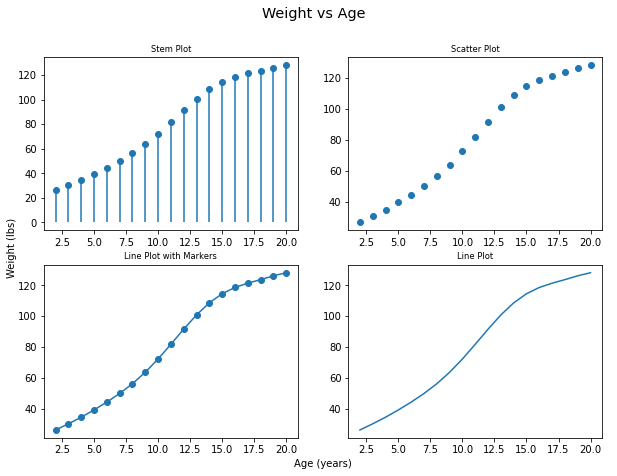

In [2]:
weightPlotGrid()

## Today we will look at the average female height versus age

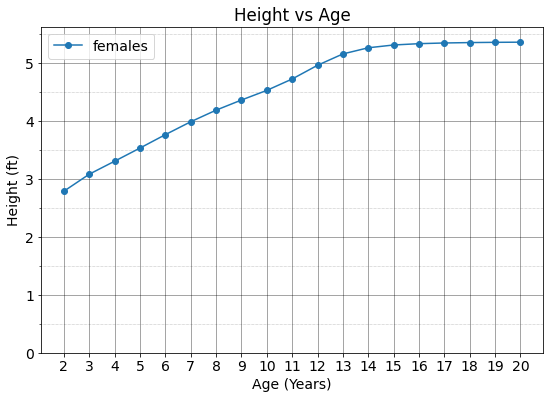

In [3]:
linePlot(agesYears,{'females':heightsF},marker='o');

<b>Q: What is the average height of a 5 year old?</b><br>
<em>3 and a half feet</em>

<b>Q: What is the average height of a 2.5 year old?</b><br>
<em>3 feet</em>


It's a bit hard to read this plot because there's so much empty space at the bottom.  Sometimes we also start the plot at something besides zero.  This can make it easier to read the data.

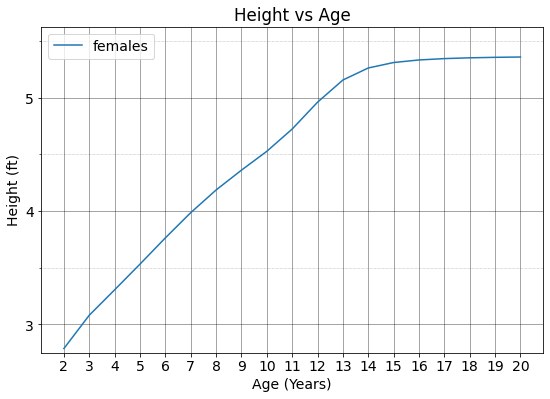

In [4]:
linePlot(agesYears,{'females':heightsF},ymin=2.75)

<b>Q: What is the average height of a 21 year old?</b><br>
<em>a little less than 5 and a half feet</em>

<b>Q: Why does the plot get flat at the end?</b><br>
<em>because people stop growing tall by the time they're a grownup.</em>

<b>Q: At what age do girls stop getting taller?</b><br>
<em> around 15 or 16 years old</em>



Now we see why our straight line for the puppy's weight was giving crazy answers in the future.  His weight and height eventually stop getting bigger!

## Add our own ages and heights to see where you fit compared to the average

<b>Q: calulcate your age, to the nearest month</b>

In [11]:
karenAge = 6 + 7/12;
jesseAge = 3 + 11/12;

<b>Q: measure your height, to the nearest inch</b>

In [12]:
karenHeight = 3 + 10/12; 
jesseHeight = 3 + 3.5/12;

#### Q: Add a tall 10 year old and short 15 year old also

In [13]:
tall10 = 5;
short15 =  5;

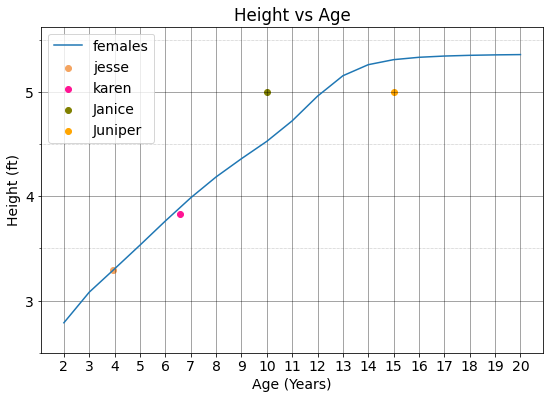

In [15]:
linePlot(agesYears,{'females':heightsF},ymin=2.5, xync = [
                 [jesseAge,jesseHeight,'jesse','sandybrown'],
                 [karenAge,karenHeight,'karen','deeppink'],
                 [10,5,'Janice','olive'],
                 [15,5,'Juniper','orange']])

<b>Q: Is Karen taller or shorter than average for her age?</b><br>
<em>A little short</em>

<b>Q: Is Jesse taller or shorter than average for her age?</b><br>
<em>Exactly average</em>

<b>Q: Who is closer to average height for their age?</b><br>
<em>Jesse</em>

## Comparing Male and Female Average Heights

Sometimes we want to plot multiple lines at the same time.  This makes it easy to compare data.

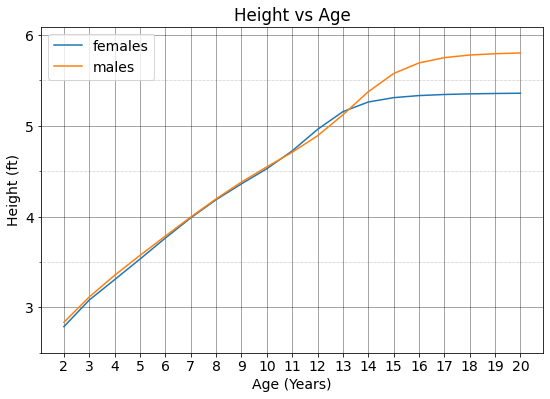

In [8]:
linePlot(agesYears,{'females':heightsF,'males':heightsM},ymin=2.5)

<b>Q: What is the average male height at age 18</b><br>
<em>5 and a half and a half</em>

<b>Q: Who is taller at age 15?</b><br>
<em>males</em>

<b>Q: Who is taller at age 3?</b><br>
<em>males</em>

<b>Q: At what age are females taller than males?</b><br>
<em>11 to 13 years old</em>